## Загрузим нужные библиотеки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Хакатоны/Оренбург/train_dataset_train.csv")

## Рассмотрим датасет по ближе

In [ ]:
df.head(3)

,id,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,...,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5,target
0,15182,32.0,9/30/2020,6694527,1469,8/26/2020,163.0,0.0,1.0,0.0,...,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,0
1,89385,NaN,6/30/2021,6712877,1392,8/5/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,47931,NaN,2/28/2021,6659444,376,6/20/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.shape

(200000, 59)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   age_indicator              159123 non-null  float64
 2   month_id                   200000 non-null  object 
 3   student_id                 200000 non-null  int64  
 4   program_id                 200000 non-null  int64  
 5   carts_created_at           200000 non-null  object 
 6   spent_time_total           86309 non-null   float64
 7   spent_time_to_complete_hw  42467 non-null   float64
 8   completed_hw               97599 non-null   float64
 9   failed_hw                  97599 non-null   float64
 10  reworked_hw                97599 non-null   float64
 11  interacted_hw              97599 non-null   float64
 12  avg_hw_mark                44496 non-null   float64
 13  test_with_good_mark        97

In [ ]:
obj = ['month_id', 'carts_created_at', 'promo', 'communication_type',
       'ABC', 'city', 'country', 'os', 'browser', 'platform']

# Закодируем признаки

In [ ]:
encoder = OrdinalEncoder()
encoder.fit(df[obj])
df[obj] = encoder.transform(df[obj])

Заменим все пропуски в данных

In [ ]:
df = df.fillna(0)

Пострим на распределение данных

Text(0.5, 1.0, 'Распределение предсказываемой величены')

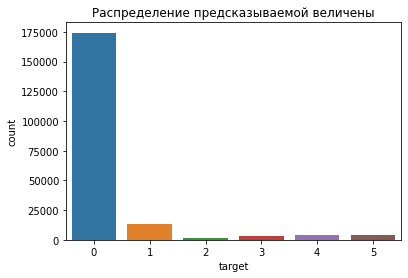

In [ ]:
sns.countplot(x = "target" , data  = df).set_title('Распределение предсказываемой величены')

Text(0.5, 1.0, 'Распределение возраста')

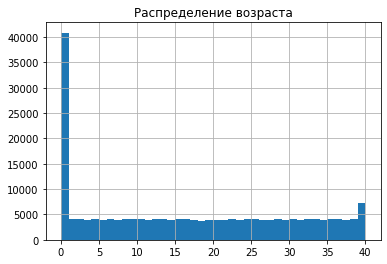

In [ ]:
df["age_indicator"].hist(bins = 40).set_title('Распределение возраста')

In [ ]:
max(df["age_indicator"])

40.0

Взглянем на несколько величин сразу

In [ ]:
df.columns

Index(['id', 'age_indicator', 'month_id', 'student_id', 'program_id',
       'carts_created_at', 'spent_time_total', 'spent_time_to_complete_hw',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration', 'payment_type', 'promo', 'price',
       'communication_type', 'auto_payment', 'ABC', 'city', 'country',
       'gender', 'speed_recall', 'os', 'browser', 'platform',
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
       'm_total_calls', 'm_was_conversations', 'm_total_duration',
       'p_avg_talk_duration', 'p_avg_duration', 'p_missed_calls',
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 'feedback_avg_d1', 'feedback_avg_d2',
       'feedback_avg_d3', 'fee

# Разделим датасет

In [ ]:
X = df.drop('target', axis = 1)
y = df[["target"]]

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

*lihgt*

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier

---------------------

*Error*

In [ ]:
from sklearn.metrics import make_scorer
def func(target, predict):
  error = 0.2* recall_score(target, predict, average='macro') + 0.8* precision_score(target, predict, average='macro')
  return error
score = make_scorer(func)

*RandomCV*

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb



rs_params = {
        'bagging_fraction': (0.2, 0.5, 0.8),
        'bagging_frequency': (3, 5, 8),
        'n_estimators' : (10, 120, 300, 500),
        'feature_fraction': (0.5, 0.8),
        'max_depth': (3, 40, 20, 100, 200),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (100, 500, 1200, 1400),
        'learning_rate' : (0.003, 0.03, 0.1, 0.3)

}

# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(estimator=lgb.LGBMClassifier(), param_distributions=rs_params, cv = 2, scoring=score, n_iter=4,verbose=1)

# Train on training data-
rs_cv.fit(x_train, y_train,verbose=1)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

RandomizedSearchCV(cv=2, estimator=LGBMClassifier(), n_iter=4,
                   param_distributions={'bagging_fraction': (0.2, 0.5, 0.8),
                                        'bagging_frequency': (3, 5, 8),
                                        'feature_fraction': (0.5, 0.8),
                                        'learning_rate': (0.003, 0.03, 0.1,
                                                          0.3),
                                        'max_depth': (3, 40, 20, 100, 200),
                                        'min_data_in_leaf': (90, 120),
                                        'n_estimators': (10, 120, 300, 500),
                                        'num_leaves': (100, 500, 1200, 1400)},
                   scoring=make_scorer(func), verbose=1)

In [ ]:
rs_cv.best_params_

{'bagging_fraction': 0.2,
 'bagging_frequency': 5,
 'feature_fraction': 0.8,
 'learning_rate': 0.03,
 'max_depth': 40,
 'min_data_in_leaf': 120,
 'n_estimators': 300,
 'num_leaves': 1200}

In [ ]:
rs_cv.fit(x_train, y_train, verbose=False)
pred = rs_cv.predict(x_valid)
0.2* recall_score(y_valid, pred, average='macro') + 0.8* precision_score(y_valid, pred, average='macro')

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

0.8909256128723151

------------------

# Выгрузка и тест

In [ ]:
test =  pd.read_csv('/content/drive/MyDrive/Хакатоны/Оренбург/test_dataset_test.csv')
test_act = test
test_act['promo'] = test_act['promo'].apply(lambda x: 1 if x == '+' else 0 )
test_act['promo'] = test_act['promo'].astype('object')
encoder = OrdinalEncoder()
encoder.fit(test_act[obj])
test_act[obj] = encoder.transform(test_act[obj])
test_act = test_act.fillna(0)


*выгрузка lgbm_cv*

In [ ]:
pred_test = rs_cv.predict(test_act)
rs_cvv = pd.DataFrame(data=pred_test)
rs_cvv = (test_act['id'].to_frame()).join(rs_cvv)
rs_cvv = rs_cvv.rename(columns = {0 : 'target'})
rs_cvv.to_csv('./rs_cvv.csv', index=False)